In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import sys

### Problem Position

In this lab, we will try to classify articles of clothing from the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. A few samples are shown below:  

<center><img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width="400"  /></center>


Fashion-MNIST is a dataset of article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [2]:
#load data
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Labels**  
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [4]:
targets_names=["T-Shirt", "Trousers", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

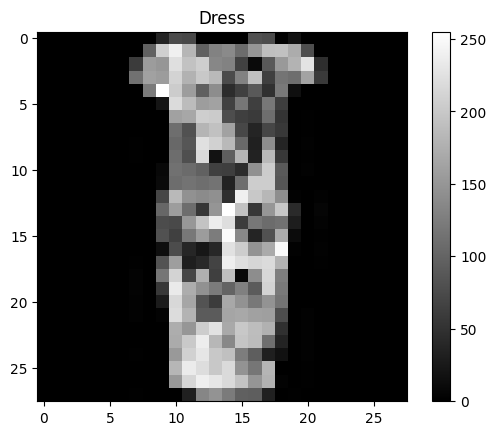

In [5]:
plt.figure()
plt.imshow(X_test[100], cmap='gray')
plt.colorbar()
plt.title(targets_names[y_test[100]])
plt.show()

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:  
**Training data — used for training the model  
Validation data — used for tuning the hyperparameters and evaluate the models  
Test data — used to test the model after the model has gone through initial vetting by the validation set.**  

In [6]:
    X_val = X_test[:8000]
    y_val = y_test[:8000]
    X_test = X_test[8000:]
    y_test = y_test[8000:]

In [7]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(60000, 28, 28)
(2000, 28, 28)
(8000, 28, 28)


### Build the Model

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


**The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data.**  

**After the pixels are flattened, the network consists of a sequence of 03 tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers:  
The first Dense layer has 256 nodes (or neurons)  
The second 128 neurons  
The 3rd 64 neurons  
The last 10 neurons returns an array with length of 10.  
Each node contains a score that indicates the current image belongs to one of the 10 classes.**    

In [9]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile The Model

In [10]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=["accuracy"])

### Train the Model

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
#validation_data : train the model on your training data and tune your hyperparameters with the results of metrics (accuracy, loss etc) that you get from your validation set.
# that's why it is important to split data into test, validation(dev) and test sets

Epoch 1/10
1875/1875 [==============================] - 26s 11ms/step - loss: 1.5874 - accuracy: 0.7758 - val_loss: 0.5213 - val_accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4858 - accuracy: 0.8307 - val_loss: 0.4998 - val_accuracy: 0.8322
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4523 - accuracy: 0.8386 - val_loss: 0.5046 - val_accuracy: 0.8226
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4224 - accuracy: 0.8495 - val_loss: 0.4819 - val_accuracy: 0.8356
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3966 - accuracy: 0.8585 - val_loss: 0.4397 - val_accuracy: 0.8432
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3811 - accuracy: 0.8648 - val_loss: 0.4364 - val_accuracy: 0.8465
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3616 - accuracy: 0.8706 - val_loss: 0.4220 - val_a

In [12]:
    # evaluate metrics
    print("\nEvaluating...", flush=True)
    print('Training data:', flush=True)
    loss, acc = model.evaluate(X_train, y_train, verbose=0)
    print("  Training : loss %.3f - acc %.3f" % (loss, acc))
    print('Validation data:', flush=True)
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print("  Validation: loss %.3f - acc %.3f" % (loss, acc))
    print('Test data:', flush=True)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))


Evaluating...
Training data:
  Training : loss 0.321 - acc 0.884
Validation data:
  Validation: loss 0.403 - acc 0.862
Test data:
  Testing  : loss 0.399 - acc 0.862


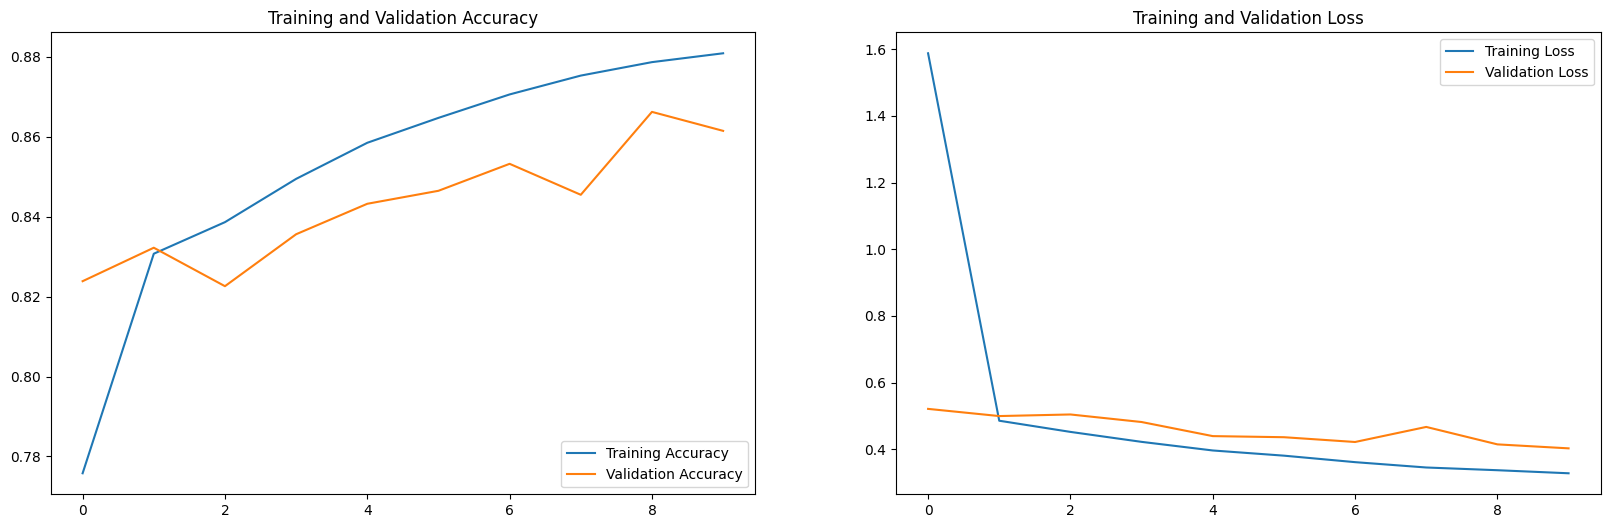

In [13]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(10)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))


Loss on the TEST Set: 0.399
Accuracy on the TEST Set: 86.200%


### Regularization

Add weight regularization

Applying L2 regularization

In [15]:
from tensorflow.keras import regularizers
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [16]:
model_l2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model_l2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.9888 - accuracy: 0.7654 - val_loss: 1.0907 - val_accuracy: 0.7866
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8908 - accuracy: 0.8306 - val_loss: 0.8014 - val_accuracy: 0.8409
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7397 - accuracy: 0.8418 - val_loss: 0.7430 - val_accuracy: 0.8273
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6196 - accuracy: 0.8496 - val_loss: 0.5941 - val_accuracy: 0.8429
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5313 - accuracy: 0.8555 - val_loss: 0.5327 - val_accuracy: 0.8461
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4833 - accuracy: 0.8593 - val_loss: 0.5026 - val_accuracy: 0.8549
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4573 - accuracy: 0.8633 - val_loss: 0.5138 - val_ac

In [17]:
   # evaluate metrics
print("\nEvaluating...", flush=True)
print('Training data:', flush=True)
loss, acc = model_l2.evaluate(X_train, y_train, verbose=0)
print("  Training : loss %.3f - acc %.3f" % (loss, acc))
print('Validation data:', flush=True)
loss, acc = model_l2.evaluate(X_val, y_val, verbose=0)
print("  Val: loss %.3f - acc %.3f" % (loss, acc))
print('Test data:', flush=True)
loss, acc = model_l2.evaluate(X_test, y_test, verbose=0)
print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))


Evaluating...
Training data:
  Training : loss 0.419 - acc 0.873
Validation data:
  Val: loss 0.485 - acc 0.852
Test data:
  Testing  : loss 0.479 - acc 0.855


Dropout

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

In [18]:

model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [19]:
model_dropout.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
model_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8872 - accuracy: 0.5347 - val_loss: 0.7889 - val_accuracy: 0.6884
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9301 - accuracy: 0.6284 - val_loss: 0.7019 - val_accuracy: 0.7196
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7914 - accuracy: 0.6793 - val_loss: 0.6569 - val_accuracy: 0.7510
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6946 - accuracy: 0.7362 - val_loss: 0.5759 - val_accuracy: 0.8109
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5826 - accuracy: 0.7916 - val_loss: 0.4952 - val_accuracy: 0.8286
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5277 - accuracy: 0.8141 - val_loss: 0.4560 - val_accuracy: 0.8351
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4920 - accuracy: 0.8258 - val_loss: 0.4896 - val_ac

In [20]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242

L2+Dropout

In [21]:
model_l2Drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
model_l2Drop.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
model_l2Drop.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.0294 - accuracy: 0.7739 - val_loss: 1.0294 - val_accuracy: 0.8060
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8881 - accuracy: 0.8311 - val_loss: 0.9111 - val_accuracy: 0.8079
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7282 - accuracy: 0.8421 - val_loss: 0.7647 - val_accuracy: 0.8239
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6084 - accuracy: 0.8490 - val_loss: 0.6067 - val_accuracy: 0.8356
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5170 - accuracy: 0.8589 - val_loss: 0.5276 - val_accuracy: 0.8481
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4772 - accuracy: 0.8576 - val_loss: 0.5125 - val_accuracy: 0.8476
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4561 - accuracy: 0.8626 - val_loss: 0.4873 - val_ac

EarlyStopping

**Early stopping is performed using tf.keras.callbacks. Callbacks provide a way to interact with the model while it's training and inforce some decisions automatically. Callbacks need to be instantiated and are added to the .fit() function via the callbacks argument.**

In [23]:
model_ES = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

model_ES.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stop training when there is no improvement in the validation loss for 2 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history_ES = model_ES.fit(X_train, y_train,
                    epochs = 10,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2428 - accuracy: 0.7641 - val_loss: 0.5702 - val_accuracy: 0.8033
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4869 - accuracy: 0.8312 - val_loss: 0.4707 - val_accuracy: 0.8407
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4333 - accuracy: 0.8475 - val_loss: 0.5024 - val_accuracy: 0.8411
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4084 - accuracy: 0.8545 - val_loss: 0.4356 - val_accuracy: 0.8481
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3900 - accuracy: 0.8620 - val_loss: 0.4566 - val_accuracy: 0.8396
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3653 - accuracy: 0.8693 - val_loss: 0.4003 - val_accuracy: 0.8579
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3546 - accuracy: 0.8734 - val_loss: 0.3991 - val_ac

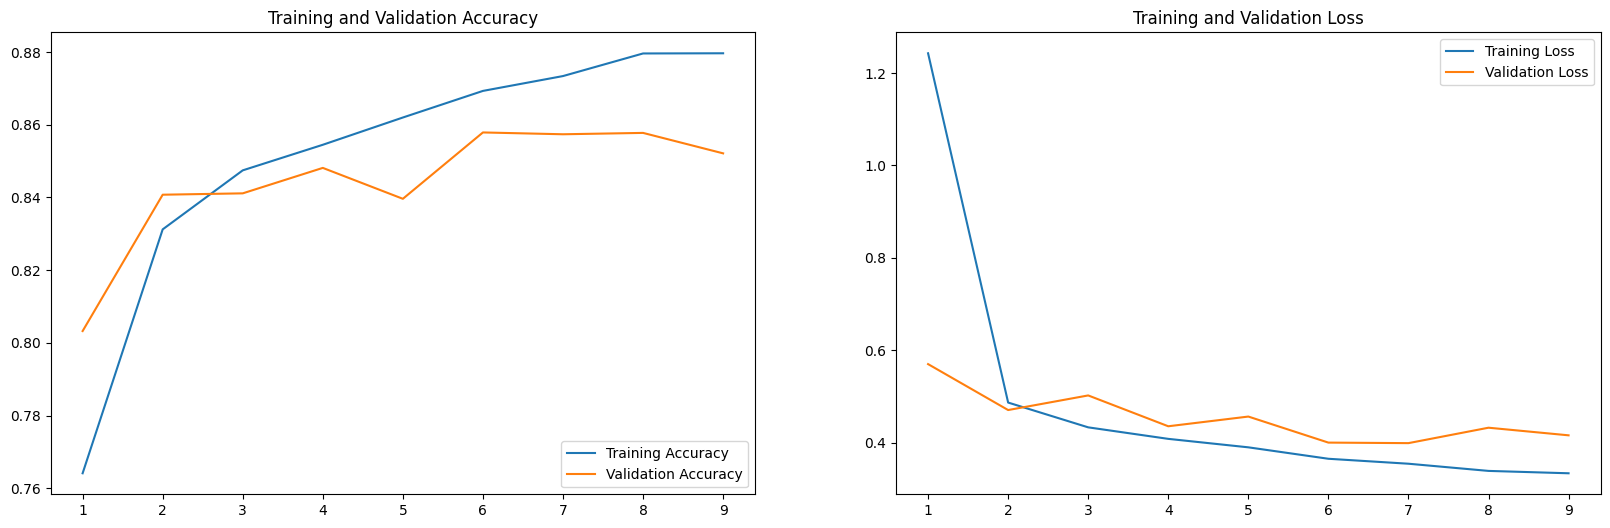

In [26]:
training_accuracy = history_ES.history['accuracy']
validation_accuracy = history_ES.history['val_accuracy']

training_loss = history_ES.history['loss']
validation_loss = history_ES.history['val_loss']

epochs_range = range(1, len(training_accuracy) + 1)  # Assuming metrics recorded for 4 epochs

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
